In [1]:
%matplotlib inline
#/*#matplotlib inline means that any graph we create, will appear in the same notebook file*/
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statistics
import seaborn as sns #styling plots
import difflib
from scipy import stats
from scipy.stats import mode
from sklearn import preprocessing  #[2] 
# from sklearn import cross_validation
from sklearn.feature_extraction import DictVectorizer #[10]
from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split  #[1][24]
from sklearn.linear_model import LogisticRegression #[5]
from sklearn.svm import SVC #[5]
from sklearn.ensemble import RandomForestClassifier #[5]
from sklearn.model_selection import cross_val_score #[5]
from sklearn.tree import DecisionTreeClassifier #[15]
from sklearn.neighbors import KNeighborsClassifier #[8]
from sklearn.naive_bayes import GaussianNB #[29]
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix
import pandas_profiling

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning) #[14]

pd.options.display.float_format = "{:.2f}".format

C:\Users\Saurabh Minotra\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [2]:
df = pd.read_csv("dataset1_processed.csv")
df

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,hours-per-week,native-country,salary
0,39,Others,77516,Bachelors,13,Never-married,Others,Not-in-family,White,Male,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,40,United-States,<=50K
4,28,Others,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,40,Cuba,<=50K
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,40,United-States,<=50K
6,49,Others,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,16,Jamaica,<=50K
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,45,United-States,>50K
8,31,Others,45781,Masters,14,Never-married,Others,Not-in-family,White,Female,50,United-States,>50K
9,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,40,United-States,>50K


In [3]:
# This code is commented as it takes a while to run but was used for analysis
# profile = pandas_profiling.ProfileReport(df)
# profile
# #reference tutorial

### Requirement 1 - Load, Encode, Normalize Data
##### Numerical Column     | Normalized in range (0,1) and drop a column (education-num)
Categorical column   | Encoding, drop a column (native-country)
Class column         | Removed missing values and encoding (0,1) of a salary column

##### 1) Numerical Columns -
Age, fnlwgt, hours-per-week are included in for the preprossing 
i)	Age            | Normalized using min max scaling in the range of 0 and 1.

ii)	fnlwgt         | Normalized minimum 0, maximum value 1. "It represents the number of people cencus belives the entry represents"[17]

iii)	hours-per-week | Normalized | It represents the number of hours and individual has worked.

iv)	education-num  | Dropped  | Education is a categorial column and eduction-num column stores corresponding education number. We have the redundant information for the education in the two columns. We tend to keep the education column and drop education-num column because, eduction-num is a numeric column and would have to be normalized which will be incorrect in this case.

v)	capital-gain,capital-loss | Dropped  | All or most values were 0

##### 2)  Categorical Columns | Encoding categorical features using DictVectorizer [10] . 

i)	In the profile_report, it is found that in categorial column native-country, there 41 distinct values (country names). But, 91.1% of the records have value "United-States". Either others values can be categorized as "Non-US" or we remove the column. I tend to remove the column native-country

ii)	Encoding
As the machine learning algorithm reads numerical values only. The dataset contains following categorical columns: 
##### workclass, education, marital-status, occupation, relationship, race, sex are encoded.

Label encoding gives the natural ordering for the different values. Say, for the workclass feature Others has encoded value 2, Self-emp-not-inc has value 5, Private has value 3. We know that in this case private class is not greater that other. It will impact the training of our dataset and the accuracy of model.Encoding is a two-step process where label encoding and one hot encoding need to used together. DictVectorizer is the single step process to do the encoding. First, the df is converted to the dictionary{column:value}. The dictionary is passed to the vectorizer object and we get numpy array as an output.The encoding is in the format that for each categorical value in the column, a category_column (e.g.'education=10th')is created and the value is marked as 0/1 for this column that category is present in that row.
 
3) Class Column (Salary)
Salary | Removed missing values
We find that there are missing values in the salary. The salary is a class variable, the original assignment requirement is to predict the values using a classifier after training the dataset. Any data imputation will have a direct impact on the training dataset. Also, the missing values are 2.8% of the total records. Hence, the missing values on the class variable are not imputed.


In [4]:
#[16] Min Max feature scaling
def normalize_min_max(column_name):
    df[column_name] = (df[column_name]-df[column_name].min()) / (df[column_name].max() - df[column_name].min()) 

In [5]:
normalize_min_max('age')
normalize_min_max('fnlwgt')
normalize_min_max('hours-per-week')

In [6]:
#[18]#Get count of records group by 
#Removing the missing values from the class column
# print('Salary missing values \n',df.groupby(["salary"])['age'].count())

df = df[df['salary'] != '?']

print('Salary after missing values \n',df.groupby(["salary"])['age'].count())
#The task is to predict the class variable(salary), the missing data in the salary is very low % . 
#Any imputation to the class variable will have a direct impact on training accuracy

Salary after missing values 
 salary
<=50K    19622
>50K      6509
Name: age, dtype: int64


In [7]:
#[19] Map values <=50K to 1 and >50K to 0
salary_map={'<=50K':1,'>50K':0}
df['salary']=df['salary'].map(salary_map)

C:\Users\Saurabh Minotra\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [8]:
X=df
X=X.drop(['native-country', 'education-num','salary'], axis=1)

In [9]:
X.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'marital-status',
       'occupation', 'relationship', 'race', 'sex', 'hours-per-week'],
      dtype='object')

In [10]:
#[10] [11] turn X into dict
X_dict = X.to_dict(orient='records') # turn each row as key-value pairs
X_dict

[{'age': 0.3013698630136986,
  'workclass': 'Others',
  'fnlwgt': 0.04261589969431777,
  'education': 'Bachelors',
  'marital-status': 'Never-married',
  'occupation': 'Others',
  'relationship': 'Not-in-family',
  'race': 'White',
  'sex': 'Male',
  'hours-per-week': 0.3979591836734694},
 {'age': 0.4520547945205479,
  'workclass': 'Self-emp-not-inc',
  'fnlwgt': 0.046558540562937,
  'education': 'Bachelors',
  'marital-status': 'Married-civ-spouse',
  'occupation': 'Exec-managerial',
  'relationship': 'Husband',
  'race': 'White',
  'sex': 'Male',
  'hours-per-week': 0.12244897959183673},
 {'age': 0.2876712328767123,
  'workclass': 'Private',
  'fnlwgt': 0.13659294597255323,
  'education': 'HS-grad',
  'marital-status': 'Divorced',
  'occupation': 'Handlers-cleaners',
  'relationship': 'Not-in-family',
  'race': 'White',
  'sex': 'Male',
  'hours-per-week': 0.3979591836734694},
 {'age': 0.4931506849315068,
  'workclass': 'Private',
  'fnlwgt': 0.1495706637583879,
  'education': '11th'

In [11]:
# DictVectorizer [10]
# instantiate a Dictvectorizer object for X
# sparse = False makes the output is not a sparse matrix
from sklearn.feature_extraction import DictVectorizer
dv_obj_X = DictVectorizer(sparse=False) 


In [12]:
#[10] apply dv_obj_X on X_dict # DictVectorizer fit and transform on the converted dict:
#Here, each row represents a sample and each column represents a feature

X_encoded = dv_obj_X.fit_transform(X_dict)
X_encoded

array([[0.30136986, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.45205479, 0.        , 0.        , ..., 1.        , 0.        ,
        0.        ],
       [0.28767123, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.31506849, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.56164384, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.47945205, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [13]:
[10]# vocabulary
enc_vocab = dv_obj_X.vocabulary_
enc_vocab

{'age': 0,
 'workclass=Others': 56,
 'fnlwgt': 17,
 'education=Bachelors': 10,
 'marital-status=Never-married': 23,
 'occupation=Others': 34,
 'relationship=Not-in-family': 47,
 'race=White': 45,
 'sex=Male': 53,
 'hours-per-week': 18,
 'workclass=Self-emp-not-inc': 59,
 'marital-status=Married-civ-spouse': 21,
 'occupation=Exec-managerial': 29,
 'relationship=Husband': 46,
 'workclass=Private': 57,
 'education=HS-grad': 12,
 'marital-status=Divorced': 19,
 'occupation=Handlers-cleaners': 31,
 'education=11th': 2,
 'race=Black': 43,
 'occupation=Prof-specialty': 36,
 'relationship=Wife': 51,
 'sex=Female': 52,
 'education=Masters': 13,
 'education=9th': 7,
 'marital-status=Married-spouse-absent': 22,
 'occupation=Other-service': 33,
 'workclass=State-gov': 60,
 'race=Asian-Pac-Islander': 42,
 'occupation=Adm-clerical': 26,
 'relationship=Own-child': 49,
 'education=7th-8th': 6,
 'occupation=Transport-moving': 40,
 'race=Amer-Indian-Eskimo': 41,
 'occupation=Machine-op-inspct': 32,
 're

### Requirement 2 - Split Data

Split Data- The data is split into the test and training set. The percentage maintained is 70 , 30.The 70% is utilized for training and 30% for testing. The percentage split is quite important because, keeping training too high, might overfit the data and the prediction will not be accurate. The X_Train includes all the independent variables and the Y_train includes the class variable(Salary). 

The underfitting and overfitting is also important concept to note and there is a risk associated with random splitting. 

In the manual train and test split, their is high risk of overfitting, meaning, "What if one subset of our data has only people from a certain occupation, employees with a certain income level but not other income levels, only women or only people at a certain age?"[28]. 


In [14]:
 #[5] X=independent variables,Y/target in dependent variable
data=X_encoded
target = np.array(df['salary'])  
X_train, X_test, Y_train, Y_test = train_test_split(data, target, test_size=0.30)

print('X Train Data',X_train.shape, '\n X Test Data',X_test.shape)

X Train Data (18291, 62) 
 X Test Data (7840, 62)


###  Support Vector Machine, Decision Tree and Naive Bayes
An array [model] is created which contains the list of classifiers. All the classifieres are called and values for the accuracy and F1 score are captured. The accuracy and F1 score are capture for both the training and test data.
#### Decision Tree
A decision tree give a structural output with the true and false. The entire population is the root node which is splitted into two or more sets. At the decision node, the it splits into sub-nodes. And, the last  or do not split node is lead node.[31] Decision Trees is widely used in various applications and on the categorical variable decision tree classification is helpful[31]
The parameters are also easy to understand. It supports various tuning parameters like criterion, max_depth, min_samples_leaf  etc

#### Naive Bayes
It is classification technique based on the Bayes therom. The likelihood table is prepared to solve the problem. It helps in multiclass prediction. [32].

#### Support Vector Machine 
SVM helps in data classification by finding a hyper plane that diffentiates two classes very well[33]. THe parameters like kernel can be used to tune the SVM. It is effective in scenarios where number of dimensions are more than number of samples[33]The SVM algorithm is expensive as it takes a while to run. It takes a large time to train.[33]



In [15]:
#Create a list of classifier
models    =[]
# models.append(['LR', LogisticRegression()])
models.append(['SVM', SVC()])
# models.append(['RF',RandomForestClassifier()])
models.append(['DT',DecisionTreeClassifier()])
# models.append(['KNN',KNeighborsClassifier()])
models.append(['NB',GaussianNB()])

In [16]:
#Run the classifier to get the accuracy and F1 score
#[7],[21],[22],[9]
acc_test  =[]
f1_test   =[]
acc_train =[]
f1_train  =[]
labels    =[]

for   model in models:
  clf=model[1].fit(X_train, Y_train)
  y_pred=        clf.predict(X_test) 
  y_pred_train = clf.predict(X_train)
  acc_test.append(accuracy_score(Y_test, y_pred))  ##test data accuracy
  f1_test.append(f1_score(Y_test, y_pred, average="macro")) #test data f1_score
  acc_train.append(accuracy_score(Y_train, y_pred_train))
  f1_train.append(f1_score(Y_train, y_pred_train, average="macro"))
  labels.append(model[0])
print(labels)
print('acc_test       |', acc_test)
print('f1_test        |', f1_test)
print('acc_train      |', acc_train)
print('f1_train       |', f1_train)
print(labels)

['SVM', 'DT', 'NB']
acc_test       | [0.8233418367346939, 0.7730867346938776, 0.5857142857142857]
f1_test        | [0.7258670322311489, 0.6989283641771432, 0.578264505388852]
acc_train      | [0.8241211524793615, 0.9999453283035372, 0.5853151823301077]
f1_train       | [0.7317857403439654, 0.9999274181888685, 0.5797438909927103]
['SVM', 'DT', 'NB']


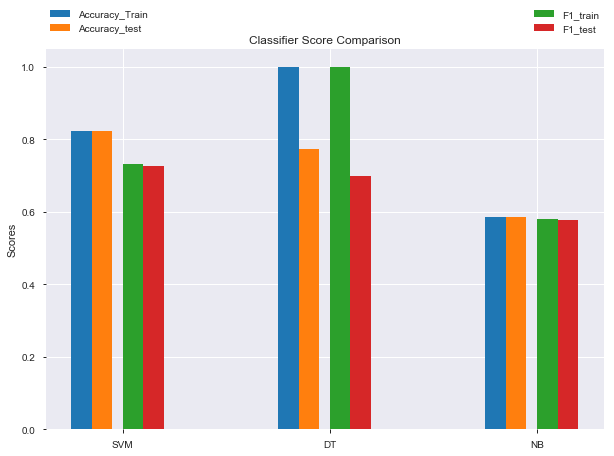

   SVM - Support Vector Machine    DT - Decision Tree       NB- Naive Bayes  


In [17]:
#[12]# plot test data
x=np.arange(len(labels))
width=0.10
fig, axes =plt.subplots(figsize=(10,7))

bar_rect1 =axes.bar(x-(width*2),acc_train,width,label='Accuracy_Train')
bar_rect1 =axes.bar(x-(width),acc_test,width,label='Accuracy_test')
bar_rect1 =axes.bar(x+(width/2),f1_train,width,label='F1_train')
bar_rect1 =axes.bar(x+((width/2)+width),f1_test,width,label='F1_test')
# bar_rect1 =axes.bar(x+(width*3),cross_score,width,label='Cross_Score')  ##commented as above cross val score is commented

# Add some text for labels, title and custom x-axis tick labels, etc.
axes.set_ylabel('Scores')
axes.set_title('Classifier Score Comparison')
axes.set_xticks(x)
axes.set_xticklabels(labels)
# ax.legend()
axes.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc='center',
           ncol=2, mode="expand", borderaxespad=0.) #[13]

plt.show()
print('   SVM - Support Vector Machine','   DT - Decision Tree   ', '   NB- Naive Bayes  ')

## Requirement 3,4 - Compare the 3 Machine Learning Algorithms
### Accuracy of Test Data (Accuracy_Test)
We have split the values into train and test. We train our model to predict the values and we can determine whether the model's guesses are correct.[26]

### Accuracy Train Data(Accuracy_Train)
We train our data and predict the values again the train data. It gives the accuracy of model on data it is constructed upon.

### Results
From the F1 score values of test data, we find that Naive Bayes is having the lowest prediction percentage, the F1 score is around 60%. The SVM has the highest percentage with 72%. The decision tree has 70.3%.

On the contrary, if we consider the F1 score on the training data, meaning, our model has already seen the data, then the F1 score is 99% for Decision Tree.

                               SVM         DT     Naive Bayes

      Accuracy_test       |    [0.823  | 0.777  | 0.614]

      F1_test             |    [0.722  | 0.703  | 0.604]

      Accuracy_train      |    [0.820  | 0.999 | 0.610]

      F1_train            |    [0.721  | 0.999 | 0.601]

['SVM' | 'DT' | 'NB']


### Cross Validation Score(K-Fold Cross Validation)
To decide which classifier is the best to use, cross validation allows us to compare different machine learning models and get a sense of how well these models work in practice.[4] Cross validation allows us to evaluate performance of a model by creating K folds of given dataset [5]. As it can be see in the image below, the data is split into the folds and on each run the training and test data changes. k-1 folds are used as the training data and the last set is used as test data. [28]
##### Then the average score is taken of all five folds to determine the best classifier
##### Cross Validation Results
Cross validation was done  and the average score was compared. The code is commented, as it takes more than 4 minutes to run. Cross Validation F1 Score for  
['SVM', 'DT', 'NB']  |  [0.723408335992114, 0.6946046144201967, 0.5932428316728412]
Please uncomment the code if required.

In [18]:
# #Run the classfier to get the crosss validation score
# ##[4][5]
# cross_score =[]
# labels1      =[]
# for   model in models:
#     clf_cross_val=model[1].fit(X_train, Y_train)
#     f1=cross_val_score(clf_cross_val, data, target, cv=5, scoring='f1_macro')
#     cross_score.append(f1.mean())   
#     labels1.append(model[0])
    
# print('Cross Validation F1 Score for ',labels1,' | \n',cross_score)

#### GridSearchCV is used to understand which parameter can be tweaked and to what value

In [19]:
#[26] The code is referred to find the best parameter
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

dt_clf = DecisionTreeClassifier()

parameter_grid = {
                 'max_depth': [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21]
                   # 'max_features': [1, 2, 3, 4,5,6,7,8,9,10,11,12,13,15]
                   # 'max_leaf_nodes':[3,5,10,11,12,13,14,15,16,20,21,2,23,24,25,2,29,30,40,50,51,52,100]
                  }
grid_search = GridSearchCV(dt_clf, param_grid = parameter_grid)
grid_search.fit(data, target)

print ("Best Score: {}".format(grid_search.best_score_))
print ("Best params: {}".format(grid_search.best_params_))

Best Score: 0.8203283456431059
Best params: {'max_depth': 7}


### Prepare Data for line chart to show impact on F1 Score on varying max_depth_length

In [20]:
#[15]
max_depth_list = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]

clf_dt_acc=[]
clf_dt_f1_test=[]
clf_dt_f1_train =[]
for i in max_depth_list:
  clf_dt_tune = DecisionTreeClassifier (criterion='entropy', max_depth =i).fit(X_train, Y_train)
  y_pred       = clf_dt_tune.predict(X_test) 
  y_pred_train = clf_dt_tune.predict(X_train)
 
  # clf_dt_acc.append(accuracy_score(Y_test, y_pred))  ##test data accuracy
  clf_dt_f1_test.append(f1_score(Y_test, y_pred, average="macro")) #test data f1_score
  clf_dt_f1_train.append(f1_score(Y_train, y_pred_train, average="macro")) #test data f1_score


# print(clf_dt_acc)
print('F1 ',clf_dt_f1_test)
print('\n',clf_dt_f1_train)

C:\Users\Saurabh Minotra\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Saurabh Minotra\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


F1  [0.4307703477818921, 0.6117993887617363, 0.6601156481572725, 0.6639003922980811, 0.6903585573107492, 0.7071114970505379, 0.7258822358671475, 0.7213800700475643, 0.7228651148798844, 0.7248134613854356, 0.7144809424465817, 0.7125098480083674, 0.710604522888293, 0.7078184736823925, 0.7157823322628368, 0.7099319851646675, 0.7136242302028117, 0.710614231107186, 0.7022684036911542, 0.7035692068997318]

 [0.42804878048780487, 0.6103075038333314, 0.6634893786961065, 0.6656908434876055, 0.6952739254864864, 0.7155134686384044, 0.7561800613367076, 0.7601556083236913, 0.76809611941217, 0.7775002654794727, 0.7855051300125573, 0.7936636823082424, 0.8042623581809913, 0.8192172898115072, 0.8373048507003651, 0.8499524440785062, 0.8637772675086107, 0.8729589762182441, 0.8808752192959838, 0.88976776515723]


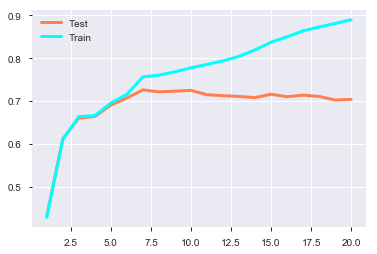

In [21]:
#[34]
plt.plot(max_depth_list,clf_dt_f1_test,'coral',label="Test",linewidth=3)
plt.plot(max_depth_list,clf_dt_f1_train,'cyan',label="Train",linewidth=3)
plt.legend()
plt.show()

The above line chart explaines that with increase in depth, bot the training and testing is increasing. The highest F1 score is achieved at depth 7. 

In [22]:
#Tuning the model, 
[15] 
max_depth_list = [7]

clf_dt_acc=[]
clf_dt_f1_test=[]
clf_dt_f1_train =[]
for i in max_depth_list:
  clf_dt_tune = DecisionTreeClassifier (criterion='entropy', max_depth =i).fit(X_train, Y_train)
  y_pred       = clf_dt_tune.predict(X_test) 
  y_pred_train = clf_dt_tune.predict(X_train)
 
  # clf_dt_acc.append(accuracy_score(Y_test, y_pred))  ##test data accuracy
  clf_dt_f1_test.append(f1_score(Y_test, y_pred, average="macro")) #test data f1_score
  clf_dt_f1_train.append(f1_score(Y_train, y_pred_train, average="macro")) #test data f1_score


print(clf_dt_acc)
print('F1 Test For depth ', max_depth_list, 'is ', clf_dt_f1_test)
print('\nF1 Train For depth', max_depth_list, 'is ', clf_dt_f1_train)

[]
F1 Test For depth  [7] is  [0.7252823538581474]

F1 Train For depth [7] is  [0.7561800613367076]


### Requirement 5

#### Reason for choosing Decision Tree
i) SVM is expensive, its takes a long time to fit and transform.
ii) Decision Tree is quite fast and works on

### Best Result
F1 Test For depth  [7] is  [0.7384979631402324]

F1 Train For depth [7] is  [0.7366454728015561] 
### Here it is observed that after tuning the data, the F1 score on trained data is 73%. So, while tuning the overfitting has been reduced.

### Relevant decision to train the model
1. Preprocessing - Getting rid of columns which are not having much dependency. Like capital loss, capital gain, native-country. THe feature_importance was also checked while deleting native country

2. Encoding - Using DictVectorizer for encoding of data and not using label encoding
3. Normalization of numerical columns
4. Chosing decision tree and ignoring SVM, KNN, Naive Bayes
5. Chosing criterion as Entropy. The entropy and information gain can be checked.
6. Using F1 score and average = macro, the results are best

### Describe the steps you have taken to find the configuration that yields the best result.
Step 1 - The decision tree algorithm is chosen as that it splits the branches based upon the True and False. It supports the supervised learning. As our data has the class column, with True and False(Salary  greater than or less than 50 k)

Step 2- Drop columns- Dropping column(native-country, education -num)

Step 3 - Split-  The model was trained using 70/30 ratio for splits. The results were also compared for 80/20, but due to risk of overfitting it was avoided

Step 4- Cross Validation - Before confirming the model, to avoid the risk of overfitting, cross validation scores were also verified.

Step 5 - GridSearchCV was used to better understand the impact of various parameters and which parameter is the best.

Step 6- Parameter Selection - After parameter selection, the parameter was chosen. max_depth_length

Step 7 - Comparing Max_Depth_Length with F1 score - using a line chart

Step 8 - Finalizing value 7 for max_depth_length

Step 9 - Getting the F1 score for train and test data which is 73.6 and 73.8 respectively. Here, it also confirmed that the overfitting is not there in trained data.

# Requirement 6- Predict Salary for dataset1_test.csv

In [23]:
df2 = pd.read_csv("dataset1_test.csv")

In [24]:
def normalize_min_max(column_name):
  # X[column_name] = (X[column_name]-X[column_name].min()) / (X[column_name].max() - X[column_name].min()) 
  df2[column_name] = (df2[column_name]-df2[column_name].min()) / (df2[column_name].max() - df2[column_name].min()) 

#Min-Max Feature scaling
# https://en.m.wikipedia.org/wiki/Normalization_(statistics)
# print(X.age)
# print(X.fnlwgt)
# print(X["hours-per-week"])

In [25]:
  normalize_min_max('age')
  normalize_min_max('fnlwgt')
  normalize_min_max('hours-per-week')

In [26]:
df2=df2.drop(['native-country', 'education-num','capital-gain', 'capital-loss'], axis=1)

In [27]:
#[10] [11] turn X into dict
X_dict_new = df2.to_dict(orient='records') # turn each row as key-value pairs
# show X_dict
X_dict_new

[{'age': 0.0,
  'workclass': 'Private',
  'fnlwgt': 0.17329312320063267,
  'education': '10th',
  'marital-status': 'Never-married',
  'occupation': 'Machine-op-inspct',
  'relationship': 'Not-in-family',
  'race': 'White',
  'sex': 'Male',
  'hours-per-week': 0.3979591836734694},
 {'age': 0.0,
  'workclass': 'Private',
  'fnlwgt': 0.018150758205656682,
  'education': '11th',
  'marital-status': 'Never-married',
  'occupation': 'Sales',
  'relationship': 'Own-child',
  'race': 'White',
  'sex': 'Female',
  'hours-per-week': 0.24489795918367346},
 {'age': 0.0,
  'workclass': 'Private',
  'fnlwgt': 0.12014898693757499,
  'education': '10th',
  'marital-status': 'Never-married',
  'occupation': 'Sales',
  'relationship': 'Own-child',
  'race': 'White',
  'sex': 'Female',
  'hours-per-week': 0.19387755102040816},
 {'age': 0.0,
  'workclass': 'Private',
  'fnlwgt': 0.0327346049990927,
  'education': '11th',
  'marital-status': 'Never-married',
  'occupation': 'Farming-fishing',
  'relations

In [28]:
Z_test_data=dv_obj_X.transform(X_dict_new)
#Here transform only
Z_test_data.shape
## REference tutorial and Teaching Lab

(15060, 62)

In [29]:
#Predict class labels for samples in Z test.
y_pred_dt_tune=clf_dt_tune.predict(Z_test_data) 
print('\n LogisticRegression Pred_Test_labels   | ', y_pred_dt_tune)
pred_dt=y_pred_dt_tune.tolist()
pred_dt
# metrics.accuracy_score(Y_test, y_pred_lr)
#Predict class labels for samples in X train.
# y_pred_train_lr = clf_lr.predict(X_train)
# print('\n LogisticRegression Pred_Train_labels  | ', y_pred_train_lr,'\n')


 LogisticRegression Pred_Test_labels   |  [1 1 1 ... 1 1 1]


[1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,


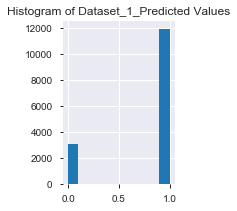

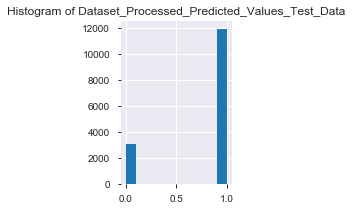

In [30]:
pd.DataFrame(y_pred_dt_tune).hist(figsize=(2,3))
plt.title("Histogram of Dataset_1_Predicted Values")

pd.DataFrame(y_pred_dt_tune).hist(figsize=(2,3))
plt.title('Histogram of Dataset_Processed_Predicted_Values_Test_Data')
plt.show()
# reference teaching lab

In [31]:
df_pred=pd.DataFrame(pred_dt)
salary_map={1:'<=50K',0:'>50K'}
df_pred[0]=df_pred[0].map(salary_map)
df_pred[0]

0        <=50K
1        <=50K
2        <=50K
3        <=50K
4        <=50K
5        <=50K
6        <=50K
7        <=50K
8        <=50K
9        <=50K
10       <=50K
11       <=50K
12       <=50K
13       <=50K
14       <=50K
15       <=50K
16       <=50K
17       <=50K
18       <=50K
19       <=50K
20       <=50K
21       <=50K
22       <=50K
23       <=50K
24       <=50K
25       <=50K
26       <=50K
27       <=50K
28       <=50K
29       <=50K
         ...  
15030    <=50K
15031     >50K
15032    <=50K
15033     >50K
15034    <=50K
15035    <=50K
15036    <=50K
15037    <=50K
15038    <=50K
15039    <=50K
15040    <=50K
15041    <=50K
15042    <=50K
15043    <=50K
15044    <=50K
15045    <=50K
15046    <=50K
15047    <=50K
15048     >50K
15049    <=50K
15050     >50K
15051    <=50K
15052    <=50K
15053    <=50K
15054    <=50K
15055    <=50K
15056    <=50K
15057    <=50K
15058    <=50K
15059    <=50K
Name: 0, Length: 15060, dtype: object

In [32]:
df_pred.to_csv('B00816404_prediction.csv', header=False,index=False)

#### Reason for not chosing KNN Classfier(Unsupervised Learning)
In the below line chart, it is observed that with increases in the n_neighbors there is decrease in F1 score of the training data. Another important thing to note w.r.t to tweaking of paramerters is that if we tend to increase the neighbors too high, it would lead to overfitting. After observing this line chart, I decided to go with the Decision Tree Classifier(Supervised Learning).

##### The KNN code is commented after training and tuning

In [33]:
# # https://medium.com/all-things-ai/in-depth-parameter-tuning-for-svc-758215394769
# #Tuning the KNN model, it takes around 870 seconds on  mins to run on Colaboratory 
# #Tuning the KNN model on Jupyter notebook on pc takes more than 20 mins
# n_neighbors= [1,3,6,9,12,15,18,21,24,27,30, 33,36,39,42,45]

# knn_acc=[]
# knn_f1_test=[]
# knn_f1_train =[]
# for i in n_neighbors:
#   knn = KNeighborsClassifier(n_neighbors =i).fit(X_train, Y_train)
#   y_pred       = knn.predict(X_test) 
#   y_pred_train = knn.predict(X_train)
 
#   # knn_acc.append(accuracy_score(Y_test, y_pred))  ##test data accuracy
#   knn_f1_test.append(f1_score(Y_test, y_pred, average="macro")) #test data f1_score
#   knn_f1_train.append(f1_score(Y_train, y_pred_train, average="macro")) #test data f1_score


# # print(knn_acc)
# print(knn_f1_test)
# print(knn_f1_train)

In [34]:
# plt.plot(n_neighbors,knn_f1_test,'coral',label="Test")
# plt.plot(n_neighbors,knn_f1_train,'cyan',label="Train")
# plt.legend()
# plt.show()

In [35]:
# n_neighbors= [12] #use the best value here
# knn_acc=[]
# knn_f1_test=[]
# knn_f1_train =[]
# for i in n_neighbors:
#   knn = KNeighborsClassifier(n_neighbors =i).fit(X_train, Y_train)
#   y_pred       = knn.predict(X_test) 
#   y_pred_train = knn.predict(X_train)
#   # knn_acc.append(accuracy_score(Y_test, y_pred))  ##test data accuracy
#   knn_f1_test.append(f1_score(Y_test, y_pred, average="macro")) #test data f1_score
#   knn_f1_train.append(f1_score(Y_train, y_pred_train, average="macro")) #test data f1_score
# knn_f1_test
# knn_f1_train

#### Decision Tree Visualization
To understand through visual representation the output of the decision tree, the code is run in the colab and the ouput is taken in the jpeg format.
An attempt was made to visualize and understand decision tree on the assignment dataset
#### The image code is commented for now. To run, kindly uncomment

In [36]:
# from IPython.display import Image  #[20]
# import pydotplus
# # pip install pydotplus
# #changing encoded vocabulary to arrary to get the list of feature columns
# dfe=pd.DataFrame(list(enc_vocab.items()), columns=['A', 'key'])
# dfe=dfe.drop(['key'], axis=1)
# dfe=np.array(dfe['A'])
# # dfe
# from sklearn import tree #[20]
# dot_data = tree.export_graphviz(clf_dt, out_file=None, 
#                                 feature_names=dfe,  
#                                 class_names='salary')
# graph = pydotplus.graph_from_dot_data(dot_data)  
# # Image(graph.create_png())
# graph.write_png("dft_test.png")

![alt text](https://)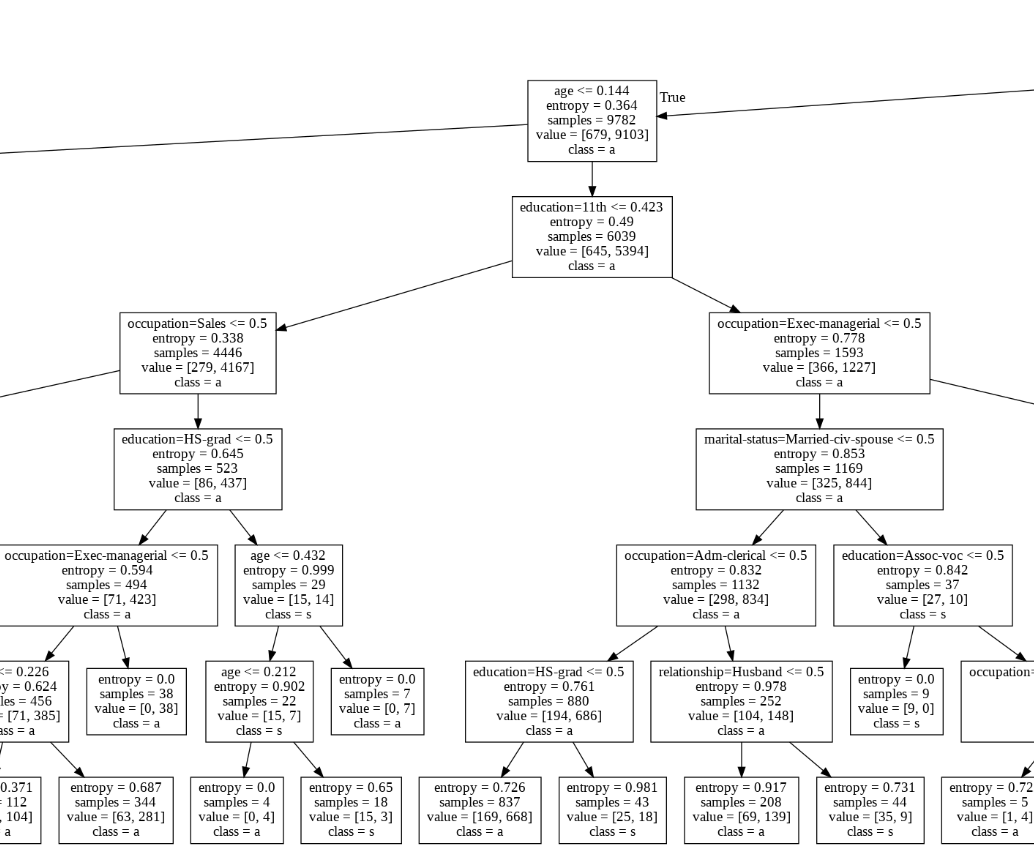


In [37]:
### References
##[1] # https://stackoverflow.com/questions/24147278/how-do-i-create-test-and-train-samples-from-one-dataframe-with-pandas
##[2] # https://stackoverflow.com/questions/53978901/importerror-cannot-import-name-cross-validation-from-sklearn
##[3] # https://www.geeksforgeeks.org/confusion-matrix-machine-learning/
##[4] # https://www.youtube.com/watch?v=fSytzGwwBVw
##[5] # https://www.youtube.com/watch?v=gJo0uNL-5Qw
##[6] #https://machinelearningmastery.com/how-to-fix-futurewarning-messages-in-scikit-learn/
##[7] #https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html
##[8] #https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html 
##[9] #https://stackoverflow.com/questions/27357121/scikit-calculate-precision-and-recall-using-cross-val-score-function
##[10]#https://towardsdatascience.com/encoding-categorical-features-21a2651a065c
##[11]#https://scikit-learn.org/stable/modules/feature_extraction.html#feature-extraction
##[12]#https://matplotlib.org/3.1.1/gallery/lines_bars_and_markers/barchart.html
##[13]#https://matplotlib.org/3.1.1/tutorials/intermediate/legend_guide.html
##[14]#https://stackoverflow.com/questions/15777951/how-to-suppress-pandas-future-warning
##[15]#https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html
##[16]#https://en.m.wikipedia.org/wiki/Normalization_(statistics)
##[17]#http://cseweb.ucsd.edu/classes/sp15/cse190-c/reports/sp15/048.pdf
##[18]#http://www.datasciencemadesimple.com/group-by-count-in-pandas-dataframe-python-2/
##[19]#http://www.compciv.org/guides/python/fundamentals/dictionaries-overview/
##[20]#https://chrisalbon.com/machine_learning/trees_and_forests/visualize_a_decision_tree/
##[21]#https://scikit-learn.org/stable/modules/svm.html
##[22]#https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html
##[23]#https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html
##[24]#https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html
##[25]#https://docs.microsoft.com/en-us/analysis-services/data-mining/training-and-testing-data-sets
##[26]#https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html
##[27]#https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.plot.html
##[28]#https://towardsdatascience.com/train-test-split-and-cross-validation-in-python-80b61beca4b6
##[29]#https://scikit-learn.org/stable/modules/naive_bayes.html
##[30]https://medium.com/all-things-ai/in-depth-parameter-tuning-for-svc-758215394769
##[31]#https://medium.com/greyatom/decision-trees-a-simple-way-to-visualize-a-decision-dc506a403aeb
##[32]#https://www.analyticsvidhya.com/blog/2017/09/naive-bayes-explained/
##[33]#https://www.analyticsvidhya.com/blog/2017/09/understaing-support-vector-machine-example-code/
##[34]#https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.plot.html